# Training v5 - use decision trees 

without feature selection

In [1]:
# load in data

import pandas as pd
import pickle

with open('data/gdsc.pkl', 'rb') as f:
    gdsc1 = pickle.load(f)
    gdsc1_drugdata = pickle.load(f)
    gdsc2 = pickle.load(f)
    gdsc2_drugdata = pickle.load(f)

with open('data/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

with open('data/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

with open('data/preprocessed/processed_data2.pkl', 'rb') as f:
    xtrain = pickle.load(f)
    ylabel = pickle.load(f)
    ylabel_binary = pickle.load(f)
    index_to_sanger = pickle.load(f)

palbo = gdsc1.loc[gdsc1['DRUG_NAME'] == 'Palbociclib']
ln_ic50 = palbo['LN_IC50']
celllines = palbo['SANGER_MODEL_ID']

no_og_features = len(gene_entrez)-1

In [2]:
print(xtrain[1,:].shape)

(19221,)


In [3]:
from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np


def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model


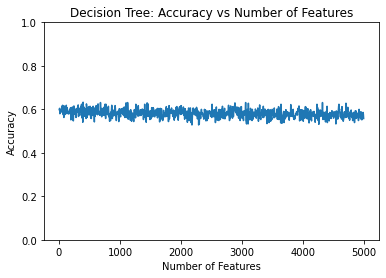

In [4]:
# selectKBest using f-classif

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from numpy import std
from numpy import mean
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# disable user warnings and runtime warnings

import warnings
warnings.filterwarnings('ignore')


acc_y = []
feature_size_x = [] 

for k_val in range(5, 5000, 5):
    # print(k_val)
    # create pipeline
    xtrain_k = SelectKBest(f_classif, k=k_val).fit_transform(xtrain, ylabel_binary)

    # define dataset
    X, y = xtrain_k, ylabel_binary
    # create pipeline

    model = DecisionTreeClassifier()
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(model, X, y, cv=kfold)
    # append results 
    acc_y.append(results.mean())
    feature_size_x.append(k_val)
    # print(k_val, results.mean())

# plot results

import matplotlib.pyplot as plt

plt.plot(feature_size_x, acc_y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Number of Features')
plt.ylim(0,1)
plt.show()


INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmprz6vnog8\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmp61_go1su\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmp7w2rt_na\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmppw1_wukq\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpa12dhxd4\assets
5 0.6640625
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpv5oqsyni\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpl7j4e1pr\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpgqq1cyv4\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpazjtf3sj\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpgyfyzklh\assets
55 0.6859375
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmp4qf7jt5l\assets
INFO:te

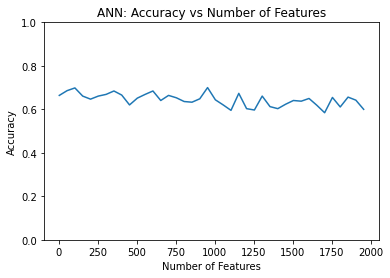

In [5]:
acc_y = []
feature_size_x = []

for k_val in range(5, 2000, 50):
    # print(k_val)
    # create pipeline
    xtrain_k = SelectKBest(f_classif, k=k_val).fit_transform(
        xtrain, ylabel_binary)

    # define dataset
    X, y = xtrain_k, ylabel_binary
    # create pipeline

    model = KerasClassifier(model=create_model(input_shape=(k_val, )), epochs=20, batch_size=10, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(model, X, y, cv=kfold)
    # append results
    acc_y.append(results.mean())
    feature_size_x.append(k_val)
    print(k_val, results.mean())

# plot results


plt.plot(feature_size_x, acc_y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('ANN: Accuracy vs Number of Features')
plt.ylim(0,1)
plt.show()

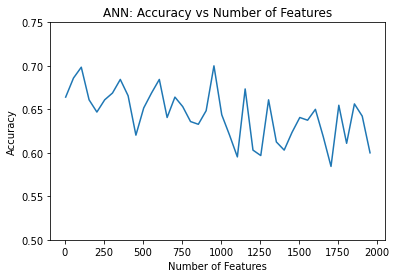

In [13]:
plt.plot(feature_size_x, acc_y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('ANN: Accuracy vs Number of Features')
plt.ylim(0.5,0.75)
plt.show()

In [5]:
# selectKBest using f-classif

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from numpy import std
from numpy import mean
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# disable user warnings and runtime warnings

import warnings
warnings.filterwarnings('ignore')

acc_y = []
feature_size_x = []

for k_val in range(5, 10000, 1000):
    # print(k_val)
    # create pipeline
    xtrain_k = SelectKBest(f_classif, k=k_val).fit_transform(
        xtrain, ylabel_binary)

    # define dataset
    X, y = xtrain_k, ylabel_binary
    # create pipeline

    model = KerasClassifier(model=create_model(input_shape=(k_val, )), epochs=20, batch_size=10, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(model, X, y, cv=kfold)
    # append results
    acc_y.append(results.mean())
    feature_size_x.append(k_val)
    print(k_val, results.mean())

# plot results


plt.plot(feature_size_x, acc_y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('ANN: Accuracy vs Number of Features')
plt.ylim(0,1)
plt.show()


INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmp3osx94ti\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpo71bkz4b\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpr37zsqrt\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpm1rt28zb\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmp2k1fqc1v\assets
5 0.6671875
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmp0mwh4u0j\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpingpy0ew\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpwn9to6rr\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmprl3ms6ir\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpuch6wquj\assets
1005 0.659375
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpo11efu6o\assets
INFO:t

NameError: name 'plt' is not defined

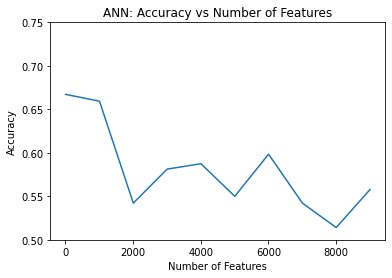

In [12]:
import matplotlib.pyplot as plt
plt.plot(feature_size_x, acc_y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('ANN: Accuracy vs Number of Features')
plt.ylim(0.5,0.75)
plt.show()